Random Forest Accuracy: 0.7166666666666667
Confusion Matrix:
 [[168   2]
 [ 66   4]]
Classification Report:
               precision    recall  f1-score   support

   Butterfly       0.72      0.99      0.83       170
 Caterpillar       0.67      0.06      0.11        70

    accuracy                           0.72       240
   macro avg       0.69      0.52      0.47       240
weighted avg       0.70      0.72      0.62       240



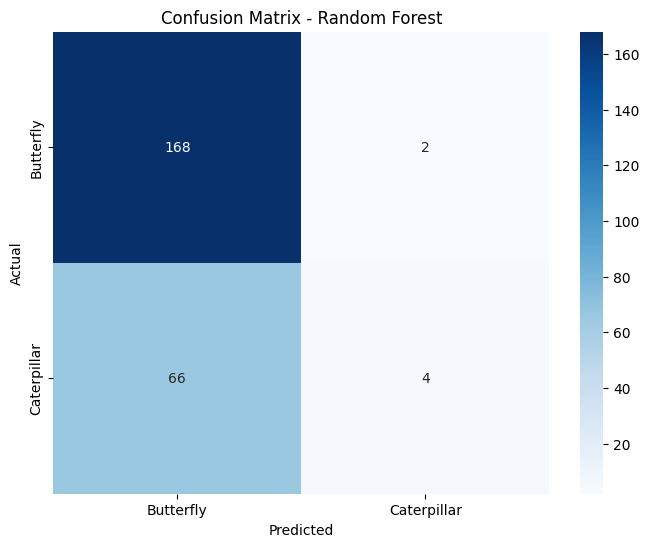

In [1]:
import numpy as np
import cv2 as cv
import os
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Definicija direktorijuma sa podacima
train_dir = r'/kaggle/input/animals-detection-images-dataset/train/'
test_dir = r'/kaggle/input/animals-detection-images-dataset/test/'

# Definicija lista klasa
labels = ['Butterfly', 'Caterpillar','Chicken', 'Crab', 'Deer', 'Duck', 'Eagle','Fish', 'Frog', 'Giraffe',
          'Goose', 'Horse', 'Jellyfish', 'Ladybug', 'Lion', 'Lizard','Monkey','Owl', 'Parrot', 'Penguin',
          'Shark','Snail', 'Snake', 'Sparrow', 'Spider','Squirrel', 'Tiger', 'Tortoise','Whale']

# Odabir podataka samo za klase "Butterfly" i "Caterpillar"
butterfly_idx = labels.index("Butterfly")
caterpillar_idx = labels.index("Caterpillar")

# Učitavanje slika za obučavanje
X_train_butterfly = []
Y_train_butterfly = []

for file in os.listdir(os.path.join(train_dir, labels[butterfly_idx])):
    img_path = os.path.join(train_dir, labels[butterfly_idx], file)
    img = cv.imread(img_path)
    if img is not None:
        img = cv.resize(img, (224, 224))
        X_train_butterfly.append(np.array(img))
        Y_train_butterfly.append(butterfly_idx)

X_train_caterpillar = []
Y_train_caterpillar = []

for file in os.listdir(os.path.join(train_dir, labels[caterpillar_idx])):
    img_path = os.path.join(train_dir, labels[caterpillar_idx], file)
    img = cv.imread(img_path)
    if img is not None:
        img = cv.resize(img, (224, 224))
        X_train_caterpillar.append(np.array(img))
        Y_train_caterpillar.append(caterpillar_idx)

# Spajanje podataka za obučavanje
X_train_rf = np.concatenate((X_train_butterfly, X_train_caterpillar))
Y_train_rf = np.concatenate((Y_train_butterfly, Y_train_caterpillar))

# Ravnanje podataka
X_train_rf = X_train_rf.reshape(X_train_rf.shape[0], -1)

# Kreiranje i obučavanje Random Forest modela
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_rf, Y_train_rf)

# Učitavanje podataka za validaciju
X_valid_butterfly = []
Y_valid_butterfly = []

for file in os.listdir(os.path.join(test_dir, labels[butterfly_idx])):
    img_path = os.path.join(test_dir, labels[butterfly_idx], file)
    img = cv.imread(img_path)
    if img is not None:
        img = cv.resize(img, (224, 224))
        X_valid_butterfly.append(np.array(img))
        Y_valid_butterfly.append(butterfly_idx)

X_valid_caterpillar = []
Y_valid_caterpillar = []

for file in os.listdir(os.path.join(test_dir, labels[caterpillar_idx])):
    img_path = os.path.join(test_dir, labels[caterpillar_idx], file)
    img = cv.imread(img_path)
    if img is not None:
        img = cv.resize(img, (224, 224))
        X_valid_caterpillar.append(np.array(img))
        Y_valid_caterpillar.append(caterpillar_idx)

# Spajanje podataka za validaciju
X_valid_rf = np.concatenate((X_valid_butterfly, X_valid_caterpillar))
Y_valid_rf = np.concatenate((Y_valid_butterfly, Y_valid_caterpillar))

# Ravnanje podataka
X_valid_rf = X_valid_rf.reshape(X_valid_rf.shape[0], -1)

# Predikcija na validacionom skupu
Y_pred_rf = random_forest_model.predict(X_valid_rf)

# Evaluacija
accuracy_rf = accuracy_score(Y_valid_rf, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Matrica konfuzije
conf_matrix_rf = confusion_matrix(Y_valid_rf, Y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Izveštaj o klasifikaciji
classification_report_rf = classification_report(Y_valid_rf, Y_pred_rf, target_names=['Butterfly', 'Caterpillar'])
print("Classification Report:\n", classification_report_rf)

# Vizualizacija matrice konfuzije
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Butterfly", "Caterpillar"], yticklabels=["Butterfly", "Caterpillar"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


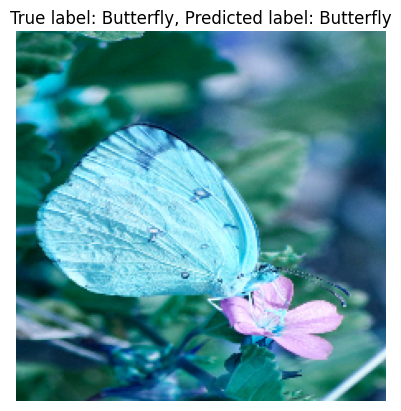

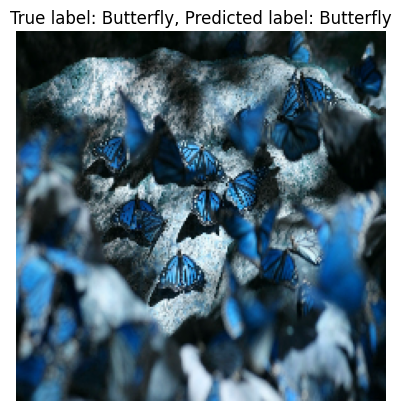

In [2]:
# Prikaz predikcije za dve nasumično izabrane slike
def display_prediction_for_images(num_images):
    for _ in range(num_images):
        idx = random.randint(0, len(X_valid_rf) - 1)
        image = X_valid_rf[idx].reshape(224, 224, 3)
        true_label = "Butterfly" if Y_valid_rf[idx] == 0 else "Caterpillar"
        
        # Predikcija klase za izabranu sliku
        prediction = random_forest_model.predict(X_valid_rf[idx].reshape(1, -1))
        predicted_label = "Butterfly" if prediction == 0 else "Caterpillar"
        
        # Prikaz slike i predikcije
        plt.imshow(image)
        plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
        plt.axis('off')
        plt.show()

# Prikaz predikcije za dve slike
display_prediction_for_images(2)

SVM Accuracy: 0.7083333333333334
Confusion Matrix:
 [[169   1]
 [ 69   1]]
Classification Report:
               precision    recall  f1-score   support

   Butterfly       0.71      0.99      0.83       170
 Caterpillar       0.50      0.01      0.03        70

    accuracy                           0.71       240
   macro avg       0.61      0.50      0.43       240
weighted avg       0.65      0.71      0.59       240



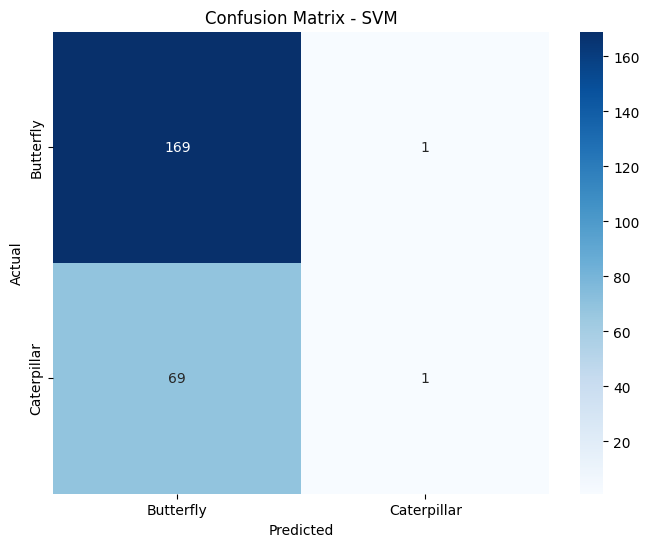

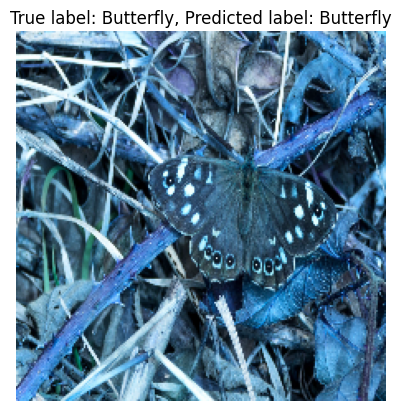

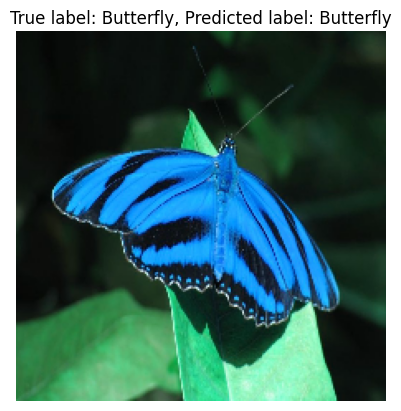

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Prvo, preoblikujemo validacione podatke da budu dvodimenzionalni
X_valid_rf_reshaped = X_valid_rf.reshape(X_valid_rf.shape[0], -1)

# Standardizacija podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rf)
X_valid_scaled = scaler.transform(X_valid_rf_reshaped)

# Kreiranje i obučavanje SVM modela
svm_model = make_pipeline(StandardScaler(), SVC())
svm_model.fit(X_train_scaled, Y_train_rf)

# Predikcija na validacionom skupu
Y_pred_svm = svm_model.predict(X_valid_scaled)

# Evaluacija
accuracy_svm = accuracy_score(Y_valid_rf, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Matrica konfuzije
conf_matrix_svm = confusion_matrix(Y_valid_rf, Y_pred_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

# Izveštaj o klasifikaciji
classification_report_svm = classification_report(Y_valid_rf, Y_pred_svm, target_names=['Butterfly', 'Caterpillar'])
print("Classification Report:\n", classification_report_svm)

# Vizualizacija matrice konfuzije
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=["Butterfly", "Caterpillar"], yticklabels=["Butterfly", "Caterpillar"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# Prikaz predikcije za dve nasumično izabrane slike
def display_prediction_for_images_svm(num_images):
    for _ in range(num_images):
        idx = random.randint(0, len(X_valid_rf) - 1)
        image = X_valid_rf[idx].reshape(224, 224, 3)
        true_label = "Butterfly" if Y_valid_rf[idx] == 0 else "Caterpillar"
        
        # Predikcija klase za izabranu sliku
        prediction = svm_model.predict(X_valid_rf_reshaped[idx].reshape(1, -1))
        predicted_label = "Butterfly" if prediction == 0 else "Caterpillar"
        
        # Prikaz slike i predikcije
        plt.imshow(image)
        plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
        plt.axis('off')
        plt.show()

# Prikaz predikcije za dve slike
display_prediction_for_images_svm(2)


Naive Bayes Accuracy: 0.3125
Classification Report - Naive Bayes:
               precision    recall  f1-score   support

   Butterfly       0.57      0.12      0.20       170
 Caterpillar       0.27      0.77      0.40        70

    accuracy                           0.31       240
   macro avg       0.42      0.45      0.30       240
weighted avg       0.48      0.31      0.26       240

Confusion Matrix:
 [[ 21 149]
 [ 16  54]]


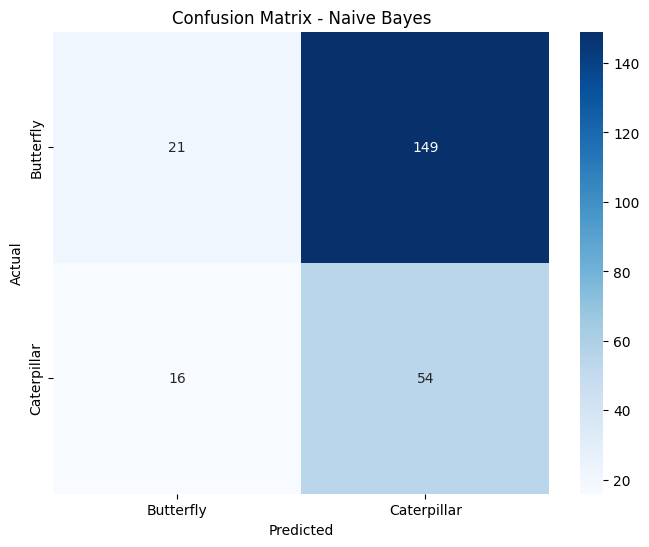

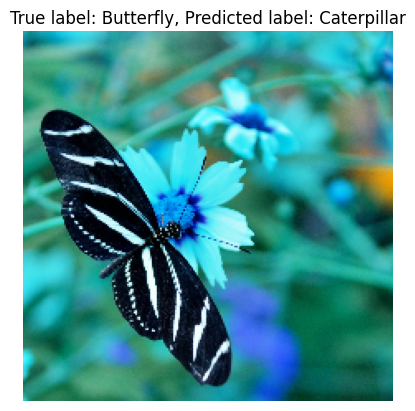

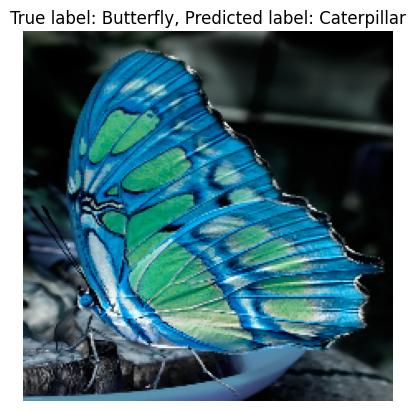

In [4]:
from sklearn.naive_bayes import GaussianNB

# Kreiranje i obučavanje Naivnog Bayes klasifikatora
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, Y_train_rf)

# Predikcija na validacionom skupu
Y_pred_nb = naive_bayes_model.predict(X_valid_scaled)

# Evaluacija
accuracy_nb = accuracy_score(Y_valid_rf, Y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Izveštaj o klasifikaciji
classification_report_nb = classification_report(Y_valid_rf, Y_pred_nb, target_names=['Butterfly', 'Caterpillar'])
print("Classification Report - Naive Bayes:\n", classification_report_nb)


# Matrica konfuzije
conf_matrix_nb = confusion_matrix(Y_valid_rf, Y_pred_nb)
print("Confusion Matrix:\n", conf_matrix_nb)

# Vizualizacija matrice konfuzije
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=["Butterfly", "Caterpillar"], yticklabels=["Butterfly", "Caterpillar"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

import random
import matplotlib.pyplot as plt

# Prikaz predikcije za dve nasumično izabrane slike
def display_prediction_for_images_nb(num_images):
    for _ in range(num_images):
        idx = random.randint(0, len(X_valid_rf) - 1)
        image = X_valid_rf[idx].reshape(224, 224, 3)
        true_label = "Butterfly" if Y_valid_rf[idx] == 0 else "Caterpillar"
        
        # Predikcija klase za izabranu sliku
        prediction = naive_bayes_model.predict(X_valid_scaled[idx].reshape(1, -1))
        predicted_label = "Butterfly" if prediction == 0 else "Caterpillar"
        
        # Prikaz slike i predikcije
        plt.imshow(image)
        plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
        plt.axis('off')
        plt.show()

# Prikaz predikcije za dve slike
display_prediction_for_images_nb(2)